In [ ]:
# For reference
t_hist_slice = t_hist.sel(time=slice('1950-01-01', '2000-12-31'), lat=slice(10,60), lon=slice(260,360))
t_hist_2p5m = t_hist_slice.sel(lev=2.5)

In [1]:
# RUN THIS [1]
# Start by importing our modules
import xarray as xr
import pandas as pd
import numpy as np
from scipy import stats

# import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [2]:
# RUN THIS [2]
# Load the historical model output dataset
ds_hist = xr.open_mfdataset('../shared-datasets/thetao_hist/*.nc')

t_hist = ds_hist.thetao

## Task 4

Using linear interpolation, produce two time series for the historical period only and at 2.5 m depth only, using the time period 1970-2000.

1. Location:  
   a. Location 1 (31.3N, 282.1E, 2.5m depth, Gulf Stream near Florida).  
   b. Location 2 (45.7N, 350.9E, 2.5 m depth, north of Spain).

2. Resample both time series to calculate the annual mean values.

3. Remove the linear trend from these annual mean time series to calculate anomalies.

4. Correlation Analysis:  
   a. How strongly correlated are the two resultant anomaly time series?  
   b. Is this correlation significant?  
   c. Is the correlation stronger or weaker if the monthly data are used instead?

In [3]:
# RUN THIS [3]
t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao # load historical 2.5m dataset

_____________________________________________________________________________________________________________________________________________________________________________________
The below code employs xarray for efficient handling of multidimensional oceanographic data. 
Linear interpolation is used to extract temperature values at specific coordinates, for analysing point locations in gridded ocean data.
The Gulf Stream location captures the western boundary current system, while the North Spain location represents eastern North Atlantic conditions.
- Gulf_stream_coords = lat: 31.3, lon: 282.1
- North_spain_coords = lat: 45.7, lon: 350.9 

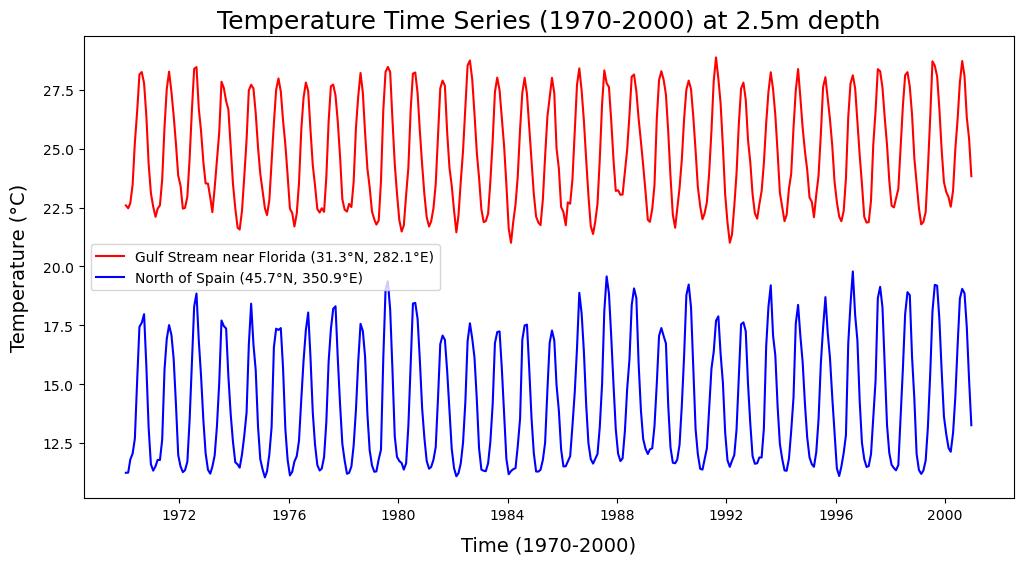

In [4]:
# Select time period (1970 - 2000)
t_hist_subset = t_hist_2p5m.sel(time=slice('1970', '2000')) 

# Define the coordinates for 1a) Gulf stream near Florida and 1b) North of Spain
gulf_stream_coords = {'lat': 31.3, 'lon': 282.1}
north_spain_coords = {'lat': 45.7, 'lon': 350.9}

# Interpolate to specific locations - implements fundamental oceanographic data analysis techniques for spatiotemporal temperature analysis
gulf_stream_temp = t_hist_subset.interp(lat=gulf_stream_coords['lat'],
                                      lon=gulf_stream_coords['lon'],
                                      method='linear') # Gulf stream
north_spain_temp = t_hist_subset.interp(lat=north_spain_coords['lat'],
                                      lon=north_spain_coords['lon'],
                                      method='linear') # North of Spain

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both time series
plt.plot(gulf_stream_temp.time, gulf_stream_temp,
         label='Gulf Stream near Florida (31.3°N, 282.1°E)',
         color='red')
plt.plot(north_spain_temp.time, north_spain_temp,
         label='North of Spain (45.7°N, 350.9°E)',
         color='blue')

# Customize the plot
plt.title('Temperature Time Series (1970-2000) at 2.5m depth', fontsize=18)
plt.xlabel('Time (1970-2000)', fontsize=14, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=14, labelpad=10)
plt.legend() 
plt.grid(False)

# Show the plot
plt.show()

______________________________________________________________________________________________________________________________________________________________________________________
This statistical analysis provides fundamental climatological parameters for both locations, essential for understanding the thermal regimes. The metrics include first-order (mean) and second-order (standard deviation) moments of the temperature distribution, along with minimum and maximum values. The output was made in markdown to produce a pofessional looking table of results

In [5]:

# Calculating the statistics
gulf_stream_stats = {
    'Location': 'Gulf Stream near Florida',
    'Annual Mean Temperature (°C)': gulf_stream_temp.mean().values,
    'Standard Deviation (°C)': gulf_stream_temp.std().values,
    'Maximum Temperature (°C)': gulf_stream_temp.max().values,
    'Minimum Temperature (°C)': gulf_stream_temp.min().values
}

north_spain_stats = {
    'Location': 'North of Spain',
    'Annual Mean Temperature (°C)': north_spain_temp.mean().values,
    'Standard Deviation (°C)': north_spain_temp.std().values,
    'Maximum Temperature (°C)': north_spain_temp.max().values,
    'Minimum Temperature (°C)': north_spain_temp.min().values
}

# Creating the DataFrame
stats_df = pd.DataFrame([gulf_stream_stats, north_spain_stats])

# Displaying the table
print(stats_df.to_string(index=False))


                Location Annual Mean Temperature (°C) Standard Deviation (°C) Maximum Temperature (°C) Minimum Temperature (°C)
Gulf Stream near Florida            24.81328524087065       2.231323579876676       28.877419052124022        21.00421333312988
          North of Spain           14.232164725334407      2.5763482152425565       19.785695648193357       11.038157386779767


### Output
|Location | Annual Mean Temperature (°C)|Standard Deviation (°C)  |Maximum Temperature (°C) |Minimum Temperature (°C) |
|-----|:---:|:---:|:-----:|:-----:|
|Gulf Stream near Florida |24.81  |2.23 |28.88 | 21 |
|North of Spain|14.23|2.58 |19.79 | 11.04 |

__________________________________________________________________________________________________________________________________________________________________________________________________________

### Result
The Gulf Stream near Florida had an average temperature of 24.8°C (sd ± 2.2), with a maximum of 28.9°C and a minimum of 21.0°C, indicating stable conditions. In contrast, the region north of Spain averaged 14.2°C (sd ± 2.6), ranging from a maximum of 19.8°C to a minimum of 11.0°C, reflecting moderate variability.

__________________________________________________________________________________________________________________________________________________________________________________________________________

The detrending process is essential for analysing temperature anomalies without long-term climate trends. The code below removes linear trends from annual mean temperature data through the following steps:
1. Applying a detrending function to remove linear trends
2. Resampling data to obtain annual temperature means.
3. Visualizing anomalies for both regions.

This method isolates underlying trends, enabling clearer analysis of interannual variability and short-term climate fluctuations.

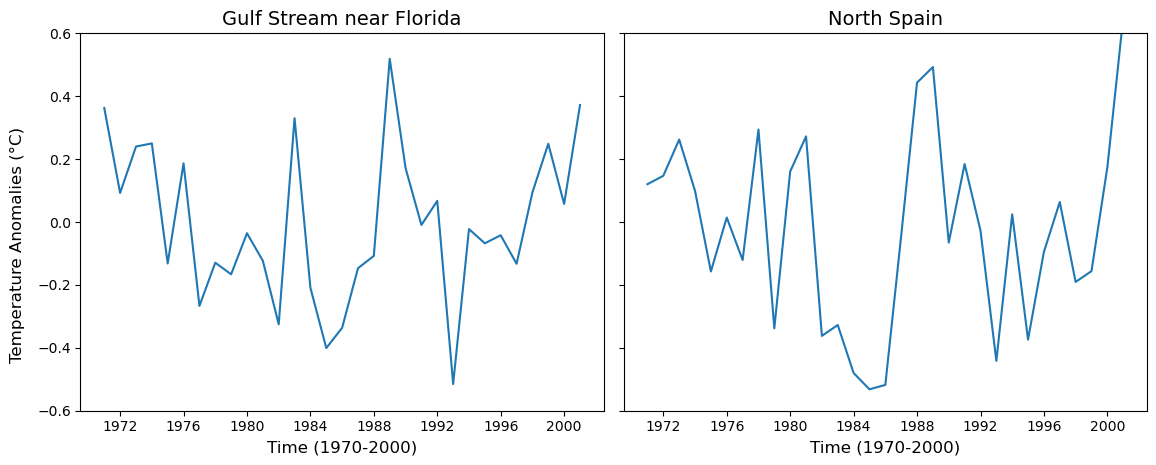

In [16]:
# Function to detrend data
def detrend(da):
    p = da.polyfit(dim='time', deg=1)
    trend = xr.polyval(da['time'], p.polyfit_coefficients)
    return da - trend

# Compute annual means
gulf_stream_annual_mean = gulf_stream_temp.resample(time='1YE').mean()
north_spain_annual_mean = north_spain_temp.resample(time='1YE').mean()

# Detrend data
gulf_stream_anomalies = detrend(gulf_stream_annual_mean)
north_spain_anomalies = detrend(north_spain_annual_mean)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Gulf Stream near Florida anomalies
gulf_stream_anomalies.plot(ax=axes[0], label='Gulf Stream Anomalies')
axes[0].set_title('Gulf Stream near Florida', fontsize=14)
axes[0].set_xlabel('Time (1970-2000)', fontsize=12)
axes[0].set_ylim(-0.6, 0.6)
axes[0].set_yticks(np.arange(-0.6, 0.7, 0.2))

# Plot North Spain anomalies
north_spain_anomalies.plot(ax=axes[1], label='North Spain Anomalies')
axes[1].set_title('North Spain', fontsize=14)
axes[1].set_xlabel('Time (1970-2000)', fontsize=12)
axes[1].set_ylim(-0.6, 0.6)
axes[1].set_yticks(np.arange(-0.6, 0.7, 0.2))

# Set a shared y-axis label 
fig.text(0.04, 0.5, 'Temperature Anomalies (°C)', va='center', rotation='vertical', fontsize=12) 

# Adjust layout between plots 
plt.subplots_adjust(wspace=0.5) 
plt.tight_layout(rect=[0.05, 0.05, 1, 1]) 
plt.show()

__________________________________________________________________________________________________________________________________________________________________________________________________________

### Correlation Analysis
- This implements Pearson correlation analysis on annual means, quantifying the statistical relationship between Gulf Stream and North Spain temperature anomalies.
- The p-value assessment determines the statistical significance of the teleconnection pattern.

**Annual**

In [7]:
from scipy.stats import pearsonr # calculate Pearson correlation coefficient and p-value.

# Compute annual means
gulf_stream_annual_mean = gulf_stream_temp.resample(time='1YE').mean() 
north_spain_annual_mean = north_spain_temp.resample(time='1YE').mean()

# Detrend data
gulf_stream_anomalies = detrend(gulf_stream_annual_mean)
north_spain_anomalies = detrend(north_spain_annual_mean)

# Convert to numpy arrays for statistical analysis
gulf_stream_anomalies_np = gulf_stream_anomalies.values
north_spain_anomalies_np = north_spain_anomalies.values

# Calculate Pearson correlation coefficient and p-value for annual data
correlation, p_value = pearsonr(gulf_stream_anomalies_np, north_spain_anomalies_np)

# Determine p-value significance 
if p_value > 1: 
    p_value_str = ">1" 
elif p_value <= 0: 
    p_value_str = "<=0" 
elif p_value < 0.001: 
    p_value_str = "<0.001" 
elif p_value < 0.05: 
    p_value_str = "<0.05" 
elif p_value < 0.1: 
    p_value_str = "<0.1" 
else: 
    p_value_str = f"{p_value:.2f}"

# Determine Pearson correlation coefficient significance 
if correlation == 1.00:
    correlation_str = "Perfect positive correlation"
elif 0.70 <= correlation < 1.00:
    correlation_str = "Strong positive correlation"
elif 0.50 <= correlation < 0.70:
    correlation_str = "Moderate positive correlation"
elif 0.30 <= correlation < 0.50:
    correlation_str = "Weak positive correlation"
elif 0.00 <= correlation < 0.30:
    correlation_str = "Negligible correlation"
elif correlation == 0.00:
    correlation_str = "No correlation"
elif -0.30 <= correlation < 0.00:
    correlation_str = "Negligible negative correlation"
elif -0.50 <= correlation < -0.30:
    correlation_str = "Weak negative correlation"
elif -0.70 <= correlation < -0.50:
    correlation_str = "Moderate negative correlation"
elif -1.00 < correlation <= -0.70:
    correlation_str = "Strong negative correlation"
elif correlation == -1.00:
    correlation_str = "Perfect negative correlation"

# Print results
print(f'Pearson correlation coefficient (annual): {correlation_str}') # Pearson 
print(f'p-value (annual): {p_value_str}') # P Value

print(f'Pearson correlation coefficient (annual): {correlation:.2f}') # Pearson = 0.58 
print(f'p-value (annual): {p_value:.4f}') # P Value = 0.0006

Pearson correlation coefficient (annual): Moderate positive correlation
p-value (annual): <0.001
Pearson correlation coefficient (annual): 0.58
p-value (annual): 0.0006


**Monthly**

Monthly analysis provides higher temporal resolution for examining ocean temperature relationships, potentially revealing seasonal dependencies in the correlation structure between the Atlantic regions.

In [8]:
from scipy.stats import pearsonr

# Compute monthly means
gulf_stream_monthly_mean = gulf_stream_temp.resample(time='1ME').mean()
north_spain_monthly_mean = north_spain_temp.resample(time='1ME').mean()

# Detrend data
gulf_stream_anomalies_monthly = detrend(gulf_stream_monthly_mean)
north_spain_anomalies_monthly = detrend(north_spain_monthly_mean)

# Convert to numpy arrays for statistical analysis
gulf_stream_anomalies_monthly_np = gulf_stream_anomalies_monthly.values
north_spain_anomalies_monthly_np = north_spain_anomalies_monthly.values

# Calculate Pearson correlation coefficient and p-value for monthly data
correlation_monthly, p_value_monthly = pearsonr(gulf_stream_anomalies_monthly_np, north_spain_anomalies_monthly_np)

# Determine p-value significance for monthly data
if p_value_monthly > 1:
    p_value_monthly_str = ">1"
elif p_value_monthly <= 0:
    p_value_monthly_str = "<=0"
elif p_value_monthly < 0.001:
    p_value_monthly_str = "<0.001"
elif p_value_monthly < 0.05:
    p_value_monthly_str = "<0.05"
elif p_value_monthly < 0.1:
    p_value_monthly_str = "<0.1"
else:
    p_value_monthly_str = f"{p_value_monthly}"

# Determine Pearson correlation coefficient significance 
if correlation == 1.00:
    correlation_monthly_str = "Perfect positive correlation"
elif 0.70 <= correlation_monthly < 1.00:
    correlation_monthly_str = "Strong positive correlation"
elif 0.50 <= correlation_monthly < 0.70:
    correlation_monthly_str = "Moderate positive correlation"
elif 0.30 <= correlation_monthly < 0.50:
    correlation_monthly_str = "Weak positive correlation"
elif 0.00 <= correlation_monthly < 0.30:
    correlation_monthly_str = "Negligible correlation"
elif correlation_monthly == 0.00:
    correlation_monthly_str = "No correlation"
elif -0.30 <= correlation_monthly < 0.00:
    correlation_monthly_str = "Negligible negative correlation"
elif -0.50 <= correlation_monthly < -0.30:
    correlation_monthly_str = "Weak negative correlation"
elif -0.70 <= correlation_monthly < -0.50:
    correlation_monthly_str = "Moderate negative correlation"
elif -1.00 < correlation_monthly <= -0.70:
    correlation_monthly_str = "Strong negative correlation"
elif correlation_monthly == -1.00:
    correlation_monthly_str = "Perfect negative correlation"

# Print results
print(f'Pearson correlation coefficient (monthly): {correlation_monthly_str}')
print(f'p-value (monthly): {p_value_monthly_str}')

print(f'Pearson correlation coefficient (monthly): {correlation_monthly:.2f}') # Pearson = 0.96
print(f'p-value (monthly): {p_value_monthly}') # P = 1.71 × 10^-213

Pearson correlation coefficient (monthly): Strong positive correlation
p-value (monthly): <0.001
Pearson correlation coefficient (monthly): 0.96
p-value (monthly): 1.7178910283544054e-213


__________________________________________________________________________________________________________________________________________________________________________________________________________

## Results


Temperature time series were created using linear interpolation for 1970 to 2000 at a depth of 2.5 meters for two locations: the Gulf Stream near Florida (31.3° N, 282.1° E) and north of Spain (45.7° N, 350.9° E). The data were resampled to obtain annual mean values and linear trends were removed to compute temperature anomalies and identify deviations from typical climate patterns.

The findings reveal distinct temperature characteristics for each location. The Gulf Stream near Florida has an annual mean temperature of 24.81°C, with a standard deviation of 2.23°C. In contrast, northern Spain has a lower annual mean temperature of 14.23°C and a slightly higher standard deviation of 2.58°C. 

The temperature extremes further emphasize these differences, with maximum and minimum temperatures of 28.88°C and 21.00°C in Florida, compared to 19.79°C and 11.04°C in northern Spain. These figures highlight that Florida has a warmer and more stable climate, while northern Spain experiences a cooler and more variable climate.

Analysis of the temperature anomalies revealed a clear seasonal cycle for both locations, with fluctuations ranging from -0.4°C to 0.6°C. Despite this variability, there is a strong positive correlation between the temperature anomalies of the two regions. The Pearson correlation coefficient for the monthly anomaly time series was calculated to be 0.96, indicating a very strong positive correlation. The extremely low p-value (<0.001) confirms this correlation is statistically significant, making it highly unlikely to occur by random chance. This strong positive correlation is consistent across the monthly data, suggesting a robust and reliable relationship between the temperature changes in these two geographically distant locations.

In conclusion, the analysis reveals that the Gulf Stream near Florida and the waters north of Spain display distinct temperature profiles, with the former being warmer and more stable. Despite their geographical separation, a marked and strong positive correlation in their temperature anomalies indicates a significant climatic connection between the two regions.